In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data =pd.read_csv('plant.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.shape

(907, 27)

In [5]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
data['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [7]:
data['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [8]:
data['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [9]:
data['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [10]:
data['other_fuel3'].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [11]:
data['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [12]:
data['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [13]:
data['wepp_id'].value_counts()

Series([], Name: wepp_id, dtype: int64)

In [14]:
data['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [15]:
data['generation_gwh_2013'].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

In [16]:
data['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [17]:
data['generation_gwh_2015'].value_counts()

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [18]:
data['generation_gwh_2016'].value_counts()

0.000000       30
8470.570000     2
1511.000000     2
886.004428      1
90.644500       1
               ..
1338.095900     1
131.021600      1
6130.019928     1
5931.490000     1
233.596650      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [19]:
data['generation_gwh_2017'].value_counts()

0.00000        32
170.08530       2
663.77450       1
1632.36715      1
272.73945       1
               ..
15177.00000     1
191.94545       1
307.37540       1
382.43820       1
865.40000       1
Name: generation_gwh_2017, Length: 408, dtype: int64

In [20]:
data['generation_gwh_2018'].value_counts()

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64

In [21]:
data['generation_gwh_2019'].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

In [22]:
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [23]:
data['estimated_generation_gwh'].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [24]:
data =data.drop(['name','generation_data_source','other_fuel2','other_fuel3','url','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)
data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,IND,India,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [25]:
data['total_generation'] = data['generation_gwh_2014'] + data['generation_gwh_2015'] + data['generation_gwh_2016'] + data['generation_gwh_2017'] + data['generation_gwh_2018'] 

In [26]:
data =data.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'] ,axis=1)
data.head(3)

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,total_generation
0,IND,India,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,IND,India,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN
2,IND,India,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN


In [27]:
data['total_generation'].fillna((data['total_generation'].mean()), inplace=True)

In [28]:
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0], inplace = True)

In [29]:
data['other_fuel1']

0      Oil
1      Oil
2      Oil
3      Oil
4      Oil
      ... 
902    Oil
903    Oil
904    Oil
905    Oil
906    Oil
Name: other_fuel1, Length: 907, dtype: object

In [30]:
data['owner'].fillna(data['owner'].mode()[0], inplace = True)

In [31]:
data['owner']

0                              Solar Paces
1                     Ultratech Cement ltd
2                                      AES
3                              Acc Acc ltd
4                              Acc Acc ltd
                      ...                 
902                            Acc Acc ltd
903    Karnataka Power Corporation Limited
904                            Acc Acc ltd
905                     Hindustan Zinc ltd
906                     iEnergy Wind Farms
Name: owner, Length: 907, dtype: object

In [35]:
data =data.fillna(0)

In [36]:
data.isnull().sum()

country                  0
country_long             0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
total_generation         0
dtype: int64

In [37]:
data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,total_generation
0,IND,India,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.0,13114.831488
1,IND,India,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,0.0,13114.831488
2,IND,India,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,0.0,AES,CDM,WRI,0.0,13114.831488
3,IND,India,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,3637.554320
4,IND,India,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,27859.499736


In [38]:
data.dtypes

country                   object
country_long              object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
geolocation_source        object
year_of_capacity_data    float64
total_generation         float64
dtype: object

In [39]:
le =LabelEncoder()
data["country"]=le.fit_transform(data["country"])
data["country_long"]=le.fit_transform(data["country_long"])
data["gppd_idnr"]=le.fit_transform(data["gppd_idnr"])
data["primary_fuel"]=le.fit_transform(data["primary_fuel"])

In [40]:
data["other_fuel1"]=le.fit_transform(data["other_fuel1"])

In [41]:
data['owner']=le.fit_transform(data['owner'])

In [42]:
data['source']=le.fit_transform(data['source'])

In [44]:
data['geolocation_source'] = data['geolocation_source'].replace(0,'National Renewable Energy Laboratory')

In [45]:
data['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory     23
Name: geolocation_source, dtype: int64

In [46]:
data['geolocation_source']=le.fit_transform(data['geolocation_source'])

In [47]:
data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,total_generation
0,0,0,657,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,0.0,13114.831488
1,0,0,519,98.0,24.7663,74.6090,1,2,0.0,258,174,2,0.0,13114.831488
2,0,0,853,39.2,21.9038,69.3732,7,2,0.0,2,21,2,0.0,13114.831488
3,0,0,0,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,2019.0,3637.554320
4,0,0,1,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,2019.0,27859.499736


In [48]:
data.shape

(907, 14)

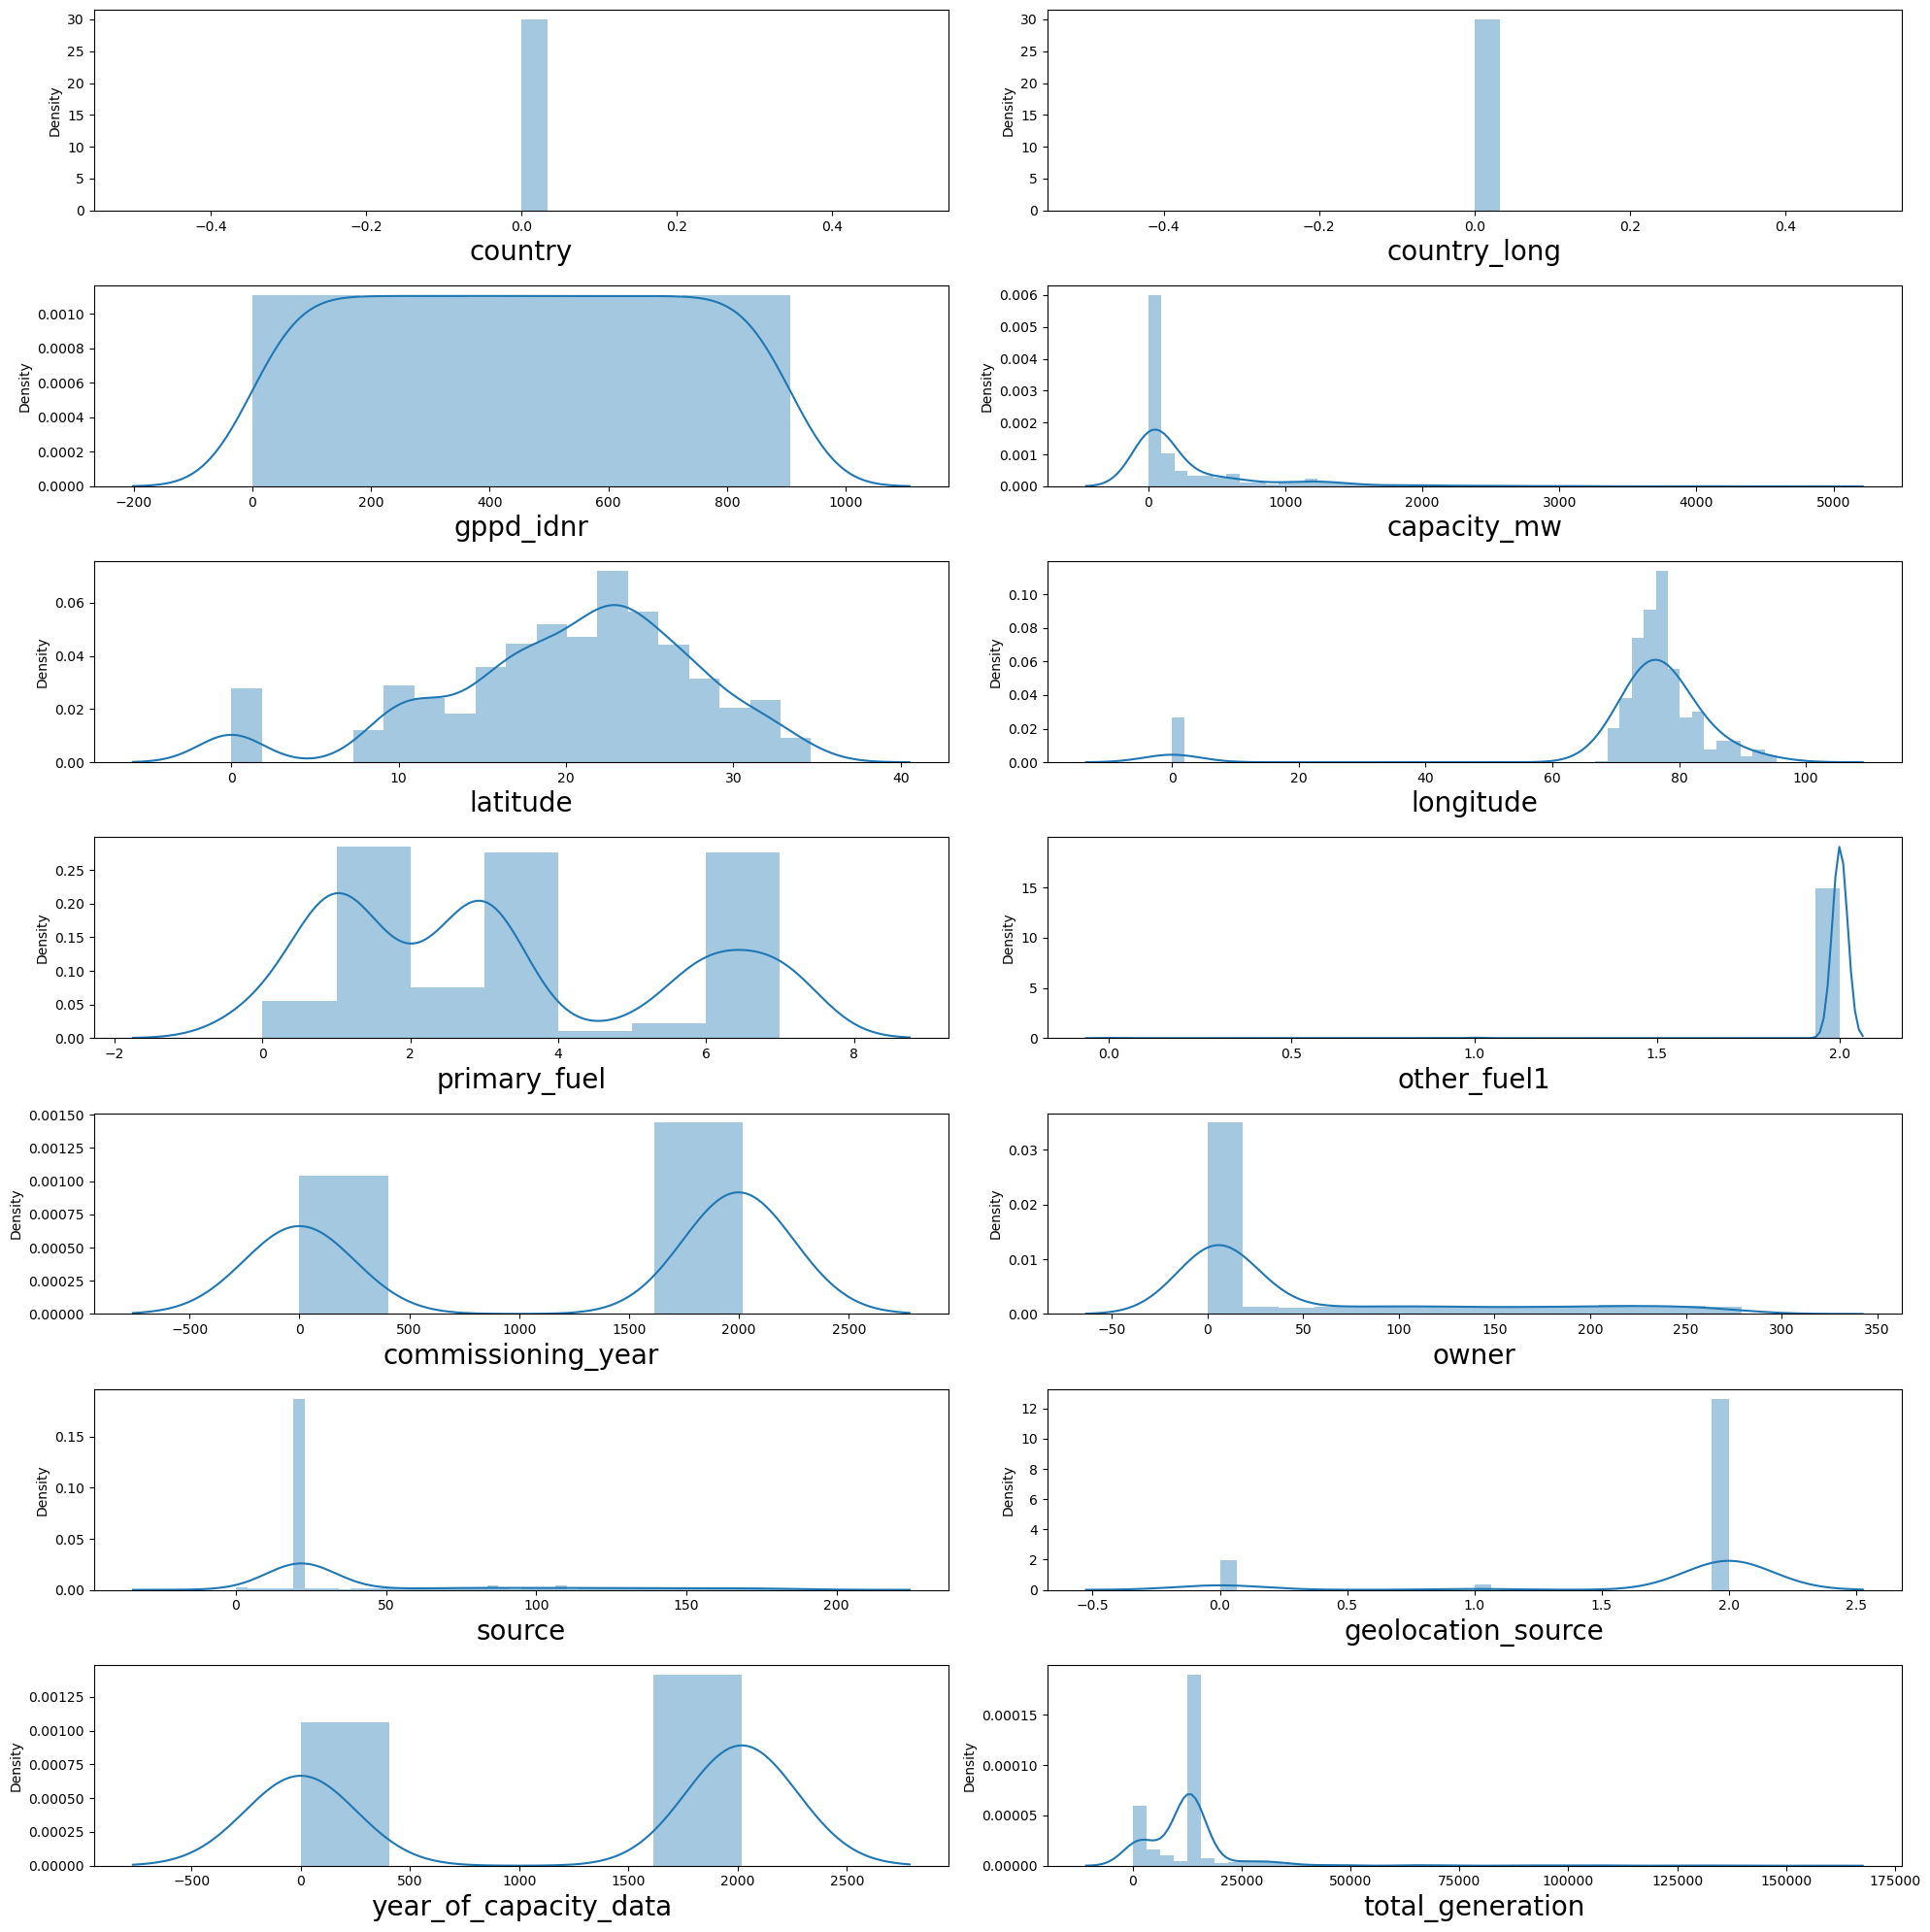

In [49]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(2,7,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

# 1 Prediction

In [50]:
x =data.drop(['primary_fuel'], axis =1)
y =data['primary_fuel']

In [51]:
x.skew().sort_values(ascending=False)

total_generation          5.222428
capacity_mw               3.123576
source                    1.827373
owner                     1.364406
country                   0.000000
country_long              0.000000
gppd_idnr                 0.000000
year_of_capacity_data    -0.292409
commissioning_year       -0.328505
latitude                 -0.730074
geolocation_source       -2.030507
longitude                -3.581827
other_fuel1             -20.453120
dtype: float64

In [52]:
x_new =power_transform(x)
x = pd.DataFrame(x_new, columns= x.columns)
x.skew().sort_values(ascending=False)

owner                     0.467077
total_generation          0.156743
capacity_mw               0.022164
country                   0.000000
country_long              0.000000
source                   -0.214066
gppd_idnr                -0.288179
year_of_capacity_data    -0.292409
latitude                 -0.323518
commissioning_year       -0.329010
longitude                -1.532802
geolocation_source       -1.897430
other_fuel1             -17.330022
dtype: float64

In [55]:
best_features =SelectKBest(score_func=f_classif, k=10)

In [56]:
fit =best_features.fit(x,y)

In [57]:
data_scores =pd.DataFrame(fit.scores_)

In [58]:
data_columns =pd.DataFrame(x.columns)

In [59]:
feature_scores =pd.concat([data_columns,data_scores], axis=1)

In [60]:
feature_scores.columns =['Feature_Name','Score']

In [61]:
print(feature_scores.nlargest(10,'Score'))

             Feature_Name        Score
10     geolocation_source  1208.542208
11  year_of_capacity_data   311.691771
7      commissioning_year   263.181532
2               gppd_idnr   199.926624
3             capacity_mw   128.078007
8                   owner   119.605746
9                  source    61.951432
12       total_generation    49.523082
5               longitude    16.048011
4                latitude    14.384278


In [62]:
new_x =data[['geolocation_source','year_of_capacity_data','commissioning_year','gppd_idnr','capacity_mw','owner','source','total_generation','longitude','latitude']]

In [63]:
scalar = StandardScaler()
x_scalar = scalar.fit_transform(new_x)

In [65]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test =train_test_split(x_scalar,y ,test_size= 0.25, random_state =i)
    rfc =RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred =rfc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random state',i)

accuracy 0.8237885462555066 random state 1
accuracy 0.8237885462555066 random state 1
accuracy 0.8414096916299559 random state 2
accuracy 0.8414096916299559 random state 2
accuracy 0.8502202643171806 random state 3
accuracy 0.8502202643171806 random state 3
accuracy 0.8502202643171806 random state 4
accuracy 0.8722466960352423 random state 5
accuracy 0.8722466960352423 random state 5
accuracy 0.8281938325991189 random state 6
accuracy 0.8370044052863436 random state 7
accuracy 0.8546255506607929 random state 8
accuracy 0.8722466960352423 random state 9
accuracy 0.8546255506607929 random state 10
accuracy 0.8810572687224669 random state 11
accuracy 0.8810572687224669 random state 11
accuracy 0.8722466960352423 random state 12
accuracy 0.8237885462555066 random state 13
accuracy 0.8854625550660793 random state 14
accuracy 0.8854625550660793 random state 14
accuracy 0.8678414096916299 random state 15
accuracy 0.8281938325991189 random state 16
accuracy 0.8854625550660793 random state 17
a

In [66]:
x_train,x_test,y_train,y_test =train_test_split(x_scalar,y ,test_size= 0.25, random_state =54)

In [67]:
lr =LogisticRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)

In [68]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.788546255506608

 confusion matrix 
 [[ 6  8  0  0  0  0  0  1]
 [ 3 49  0  7  0  0  0  0]
 [ 2  2  1 10  0  0  0  0]
 [ 0  9  0 49  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 43]]

 report :               precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.69      0.83      0.75        59
           2       1.00      0.07      0.12        15
           3       0.71      0.84      0.77        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        43

    accuracy                           0.79       227
   macro avg       0.62      0.52      0.51       227
weighted avg       0.78      0.79      0.76       227



In [69]:
scr = cross_val_score(lr,x_scalar,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.775122263623661


In [70]:
# KNN Classifier
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred =knn.predict(x_test)

In [71]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.7929515418502202

 confusion matrix 
 [[ 9  6  0  0  0  0  0  0]
 [ 4 51  1  3  0  0  0  0]
 [ 1  6  5  3  0  0  0  0]
 [ 0 11  4 43  0  0  0  0]
 [ 0  1  0  1  0  0  0  1]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 29  2]
 [ 0  0  0  0  0  0  0 43]]

 report :               precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.67      0.86      0.76        59
           2       0.45      0.33      0.38        15
           3       0.84      0.74      0.79        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.94      0.97        31
           7       0.93      1.00      0.97        43

    accuracy                           0.79       227
   macro avg       0.57      0.56      0.56       227
weighted avg       0.78      0.79      0.78       227



In [72]:
scr = cross_val_score(knn,x_scalar,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.7795082285359416


In [73]:
# Random Forest Classifier
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)

In [74]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.8986784140969163

 confusion matrix 
 [[11  4  0  0  0  0  0  0]
 [ 1 54  0  3  0  1  0  0]
 [ 1  4  8  2  0  0  0  0]
 [ 0  3  0 55  0  0  0  0]
 [ 0  1  0  1  0  0  0  1]
 [ 0  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 43]]

 report :               precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.82      0.92      0.86        59
           2       0.89      0.53      0.67        15
           3       0.90      0.95      0.92        58
           4       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        43

    accuracy                           0.90       227
   macro avg       0.76      0.72      0.74       227
weighted avg       0.89      0.90      0.89       227



In [75]:
scr = cross_val_score(rf,x_scalar,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8610173109765564


In [76]:
# Decision Tree Classifier
dtc =DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred =dtc.predict(x_test)

In [77]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.8061674008810573

 confusion matrix 
 [[11  4  0  0  0  0  0  0]
 [ 6 48  0  3  1  1  0  0]
 [ 0  5  2  6  0  2  0  0]
 [ 1  7  2 47  0  1  0  0]
 [ 0  1  1  0  0  0  0  1]
 [ 0  0  1  1  0  1  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 43]]

 report :               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.74      0.81      0.77        59
           2       0.33      0.13      0.19        15
           3       0.82      0.81      0.82        58
           4       0.00      0.00      0.00         3
           5       0.20      0.33      0.25         3
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        43

    accuracy                           0.81       227
   macro avg       0.59      0.60      0.59       227
weighted avg       0.79      0.81      0.79       227



In [78]:
scr = cross_val_score(dtc,x_scalar,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8169150752988666


## Hyperparameter Tuning

In [79]:
rfc = RandomForestClassifier()

In [101]:
params ={'n_estimators':[10,15],
         'criterion':['entropy','gini'],
         'max_depth':[8,15],
          'min_samples_split':[2,11],
           'min_samples_leaf':[2,10]}

In [102]:
grd =GridSearchCV(rfc,param_grid=params)

In [103]:
grd.fit(x_train,y_train)
print('best_params = ',grd.best_params_)

best_params =  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15}


In [104]:
rfc =grd.best_estimator_ 

In [105]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=15)

In [106]:
y_pred =rfc.predict(x_test)

In [107]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.8854625550660793

 confusion matrix 
 [[12  3  0  0  0  0  0  0]
 [ 1 53  1  3  0  1  0  0]
 [ 1  5  7  2  0  0  0  0]
 [ 0  5  0 53  0  0  0  0]
 [ 0  1  0  1  0  0  0  1]
 [ 0  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 43]]

 report :               precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.79      0.90      0.84        59
           2       0.88      0.47      0.61        15
           3       0.88      0.91      0.90        58
           4       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        43

    accuracy                           0.89       227
   macro avg       0.76      0.72      0.73       227
weighted avg       0.88      0.89      0.88       227



In [108]:
scr = cross_val_score(rfc,x_scalar,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8511391864617295


# 2 Prediction

In [116]:
x =data.drop(['capacity_mw'], axis =1)
y =data['capacity_mw']

In [117]:
scalar = StandardScaler()
scalar.fit_transform(x)

array([[ 0.        ,  0.        ,  0.77913689, ..., -1.04183792,
        -1.15655906,  0.        ],
       [ 0.        ,  0.        ,  0.2520737 , ...,  0.42092832,
        -1.15655906,  0.        ],
       [ 0.        ,  0.        ,  1.52771939, ...,  0.42092832,
        -1.15655906,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.67285273, ...,  0.42092832,
        -1.15655906,  0.        ],
       [ 0.        ,  0.        ,  0.32845967, ...,  0.42092832,
        -1.15655906,  0.        ],
       [ 0.        ,  0.        ,  1.61556326, ...,  0.42092832,
        -1.15655906,  0.        ]])

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 ,random_state=5)

In [119]:
# LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [120]:
lr.score(x_test,y_test)

0.7250115587993653

In [123]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 185.7676658811557
 MSE  : 107573.9245575761
 RMSE : 327.9846407342516


In [124]:
metrics.r2_score(y_test,y_predict)

0.7250115587993653

In [125]:
# DecisionTree

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)

In [126]:
dt.score(x_test,y_test)

0.7084261761661496

In [127]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 168.71407692307693
 MSE  : 114062.03253896702
 RMSE : 337.73071009158616


In [128]:
metrics.r2_score(y_test,y_predict)

0.7084261761661496

In [129]:
# RandomForest

rf = RandomForestRegressor()

rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

In [130]:
rf.score(x_test,y_test)

0.8166735120545306

In [131]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 138.6382717032967
 MSE  : 71716.28631933128
 RMSE : 267.7989662402215


In [132]:
metrics.r2_score(y_test,y_predict)

0.8166735120545306

In [133]:
# KNeighbors

knn = KNeighborsRegressor()

knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

In [134]:
knn.score(x_test,y_test)

0.7158292349128141

In [135]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 167.92893736263738
 MSE  : 111165.99778335361
 RMSE : 333.4156531768621


In [136]:
metrics.r2_score(y_test,y_predict)

0.7158292349128141